<a href="https://colab.research.google.com/github/Enoch-Oluwanifemi/Diabetes-Prediction/blob/master/Enoch_et_Ojay_Hybridization_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [79]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [80]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [81]:
data.shape

(768, 9)

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [83]:
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [84]:
data['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


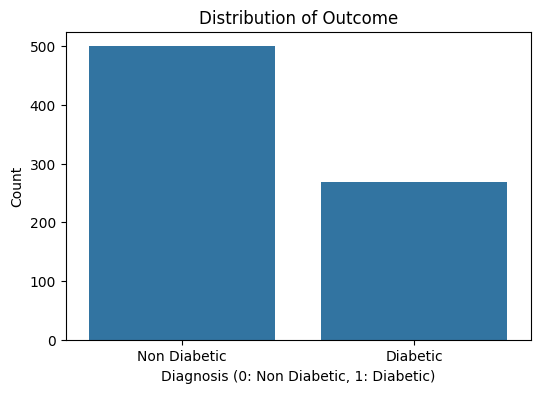

In [85]:
Outcome = df['Outcome'].value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=Outcome.index, y=Outcome.values)
plt.title('Distribution of Outcome')
plt.xlabel('Diagnosis (0: Non Diabetic, 1: Diabetic)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non Diabetic', 'Diabetic'])
plt.show()

In [86]:
from imblearn.over_sampling import SMOTE


In [87]:
X = data.drop('Outcome', axis=1)   # features
y = data['Outcome']

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [89]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
353,1,90,62,12,43,27.2,0.580,24
711,5,126,78,27,22,29.6,0.439,40
373,2,105,58,40,94,34.9,0.225,25
46,1,146,56,0,0,29.7,0.564,29
682,0,95,64,39,105,44.6,0.366,22
...,...,...,...,...,...,...,...,...
451,2,134,70,0,0,28.9,0.542,23
113,4,76,62,0,0,34.0,0.391,25
556,1,97,70,40,0,38.1,0.218,30
667,10,111,70,27,0,27.5,0.141,40


In [90]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
44,7,159,64,0,0,27.4,0.294,40
672,10,68,106,23,49,35.5,0.285,47
700,2,122,76,27,200,35.9,0.483,26
630,7,114,64,0,0,27.4,0.732,34
81,2,74,0,0,0,0.0,0.102,22
...,...,...,...,...,...,...,...,...
32,3,88,58,11,54,24.8,0.267,22
637,2,94,76,18,66,31.6,0.649,23
593,2,82,52,22,115,28.5,1.699,25
425,4,184,78,39,277,37.0,0.264,31


In [91]:
y_test.count()

np.int64(154)

In [92]:
y_train.count()

np.int64(614)

In [93]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_res.value_counts())

Before SMOTE: Outcome
0    400
1    214
Name: count, dtype: int64
After SMOTE: Outcome
0    400
1    400
Name: count, dtype: int64


In [94]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train_res, y_train_res)
y_pred_svm = svm_model.predict(X_test)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_res, y_train_res)
y_pred_rf = rf_model.predict(X_test)

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_res, y_train_res)
y_pred_xgb = xgb_model.predict(X_test)




/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [00:07:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [95]:
print("\nSVM Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

print("----------------------------------------------")

print("\nRandom Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

print("----------------------------------------------")


print("\nXGBoost Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


SVM Results:
Accuracy: 0.7272727272727273
              precision    recall  f1-score   support

           0       0.81      0.76      0.78       100
           1       0.60      0.67      0.63        54

    accuracy                           0.73       154
   macro avg       0.70      0.71      0.71       154
weighted avg       0.74      0.73      0.73       154

----------------------------------------------

Random Forest Results:
Accuracy: 0.7467532467532467
              precision    recall  f1-score   support

           0       0.82      0.78      0.80       100
           1       0.63      0.69      0.65        54

    accuracy                           0.75       154
   macro avg       0.72      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154

----------------------------------------------

XGBoost Results:
Accuracy: 0.7597402597402597
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       100


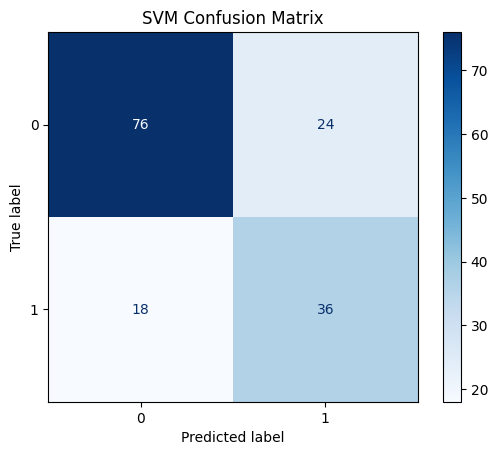

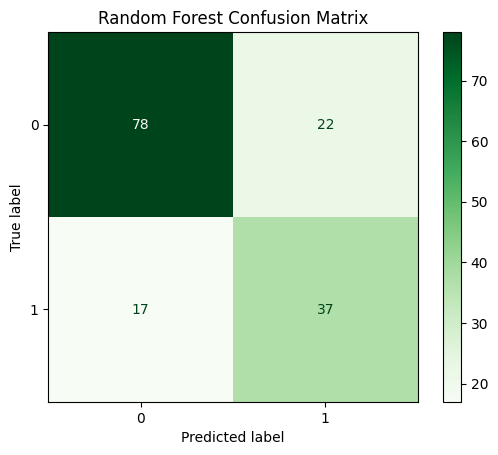

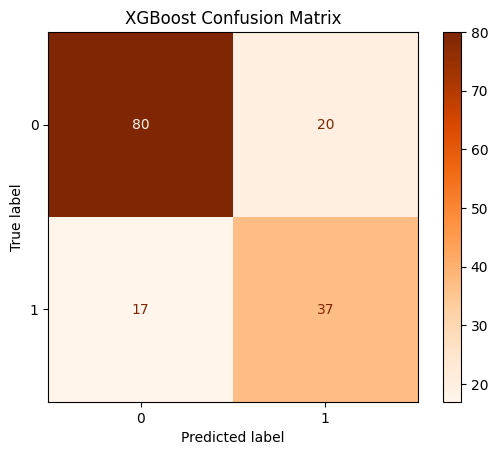

In [96]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=[0,1])
disp_svm.plot(cmap="Blues")
plt.title("SVM Confusion Matrix")
plt.show()

cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=[0,1])
disp_rf.plot(cmap="Greens")
plt.title("Random Forest Confusion Matrix")
plt.show()

cm_xgb = confusion_matrix(y_test, y_pred_xgb)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=[0,1])
disp_xgb.plot(cmap="Oranges")
plt.title("XGBoost Confusion Matrix")
plt.show()


In [97]:
hybrid_model = VotingClassifier(estimators=[('svm', svm_model), ('xgb', xgb_model)],voting='soft')   # soft = uses predicted probabilities)
hybrid_model.fit(X_train_res, y_train_res)
y_pred_hybrid = hybrid_model.predict(X_test)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [00:07:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [98]:
print("Hybrid Model Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_hybrid))
print(classification_report(y_test, y_pred_hybrid))

Hybrid Model Results:
Accuracy: 0.7532467532467533
              precision    recall  f1-score   support

           0       0.82      0.79      0.81       100
           1       0.64      0.69      0.66        54

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.76       154



In [100]:
joblib.dump(stacking_model, "hybrid_model.pkl")   # save
model = joblib.load("hybrid_model.pkl")           # reload
prediction = model.predict(X_test)
print(prediction)

[1 0 0 1 0 1 0 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0
 0 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 1 0 0 1 0 1 1 0 0 1 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0
 1 1 1 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 1 0]
